In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :

- Ajustad un modelo de Decision Tree a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [3]:
df_esta = pd.read_csv("./datos/cortos_estand.csv", index_col = 0)
df_esta.head()

,satisfaction,Customer Type,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding,Age_est,Flight Distance_est,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,0,0,4,3,3,5,3,2,1.676424,-1.758838,1,0,0,1,0,1,0
1,1,1,0,0,2,3,4,2,3,2,0.486731,0.583063,0,1,0,1,1,0,0
2,1,1,0,0,0,2,3,4,4,2,-1.628279,0.235878,1,0,0,1,0,1,0
3,1,1,0,0,4,1,1,4,1,3,1.345954,-1.377574,1,0,0,1,0,1,0
4,1,1,0,0,3,2,2,4,2,5,2.006895,-1.664055,1,0,0,1,0,1,0


In [4]:
# separamos los datos en X e y

X1 = df_esta.drop("satisfaction", axis = 1)
y1 = df_esta["satisfaction"]

In [5]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [7]:
#fig = plt.figure(figsize = (10,6))
#tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
#plt.show()

In [8]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train1.columns))
max_features

4.242640687119285

In [9]:
# max depth
print(arbol.tree_.max_depth)

36


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [11]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [12]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.920143,0.922581,0.931057,0.926799,0.838958,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


In [13]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [6, 12, 18,24,30,36], 
        "max_features": [1,2,3],
        
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [14]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10,  
            verbose=-1) # para que no nos printee ningún mensaje en pantalla


In [15]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 12, 18, 24, 30, 36],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [16]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=36, max_features=3, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

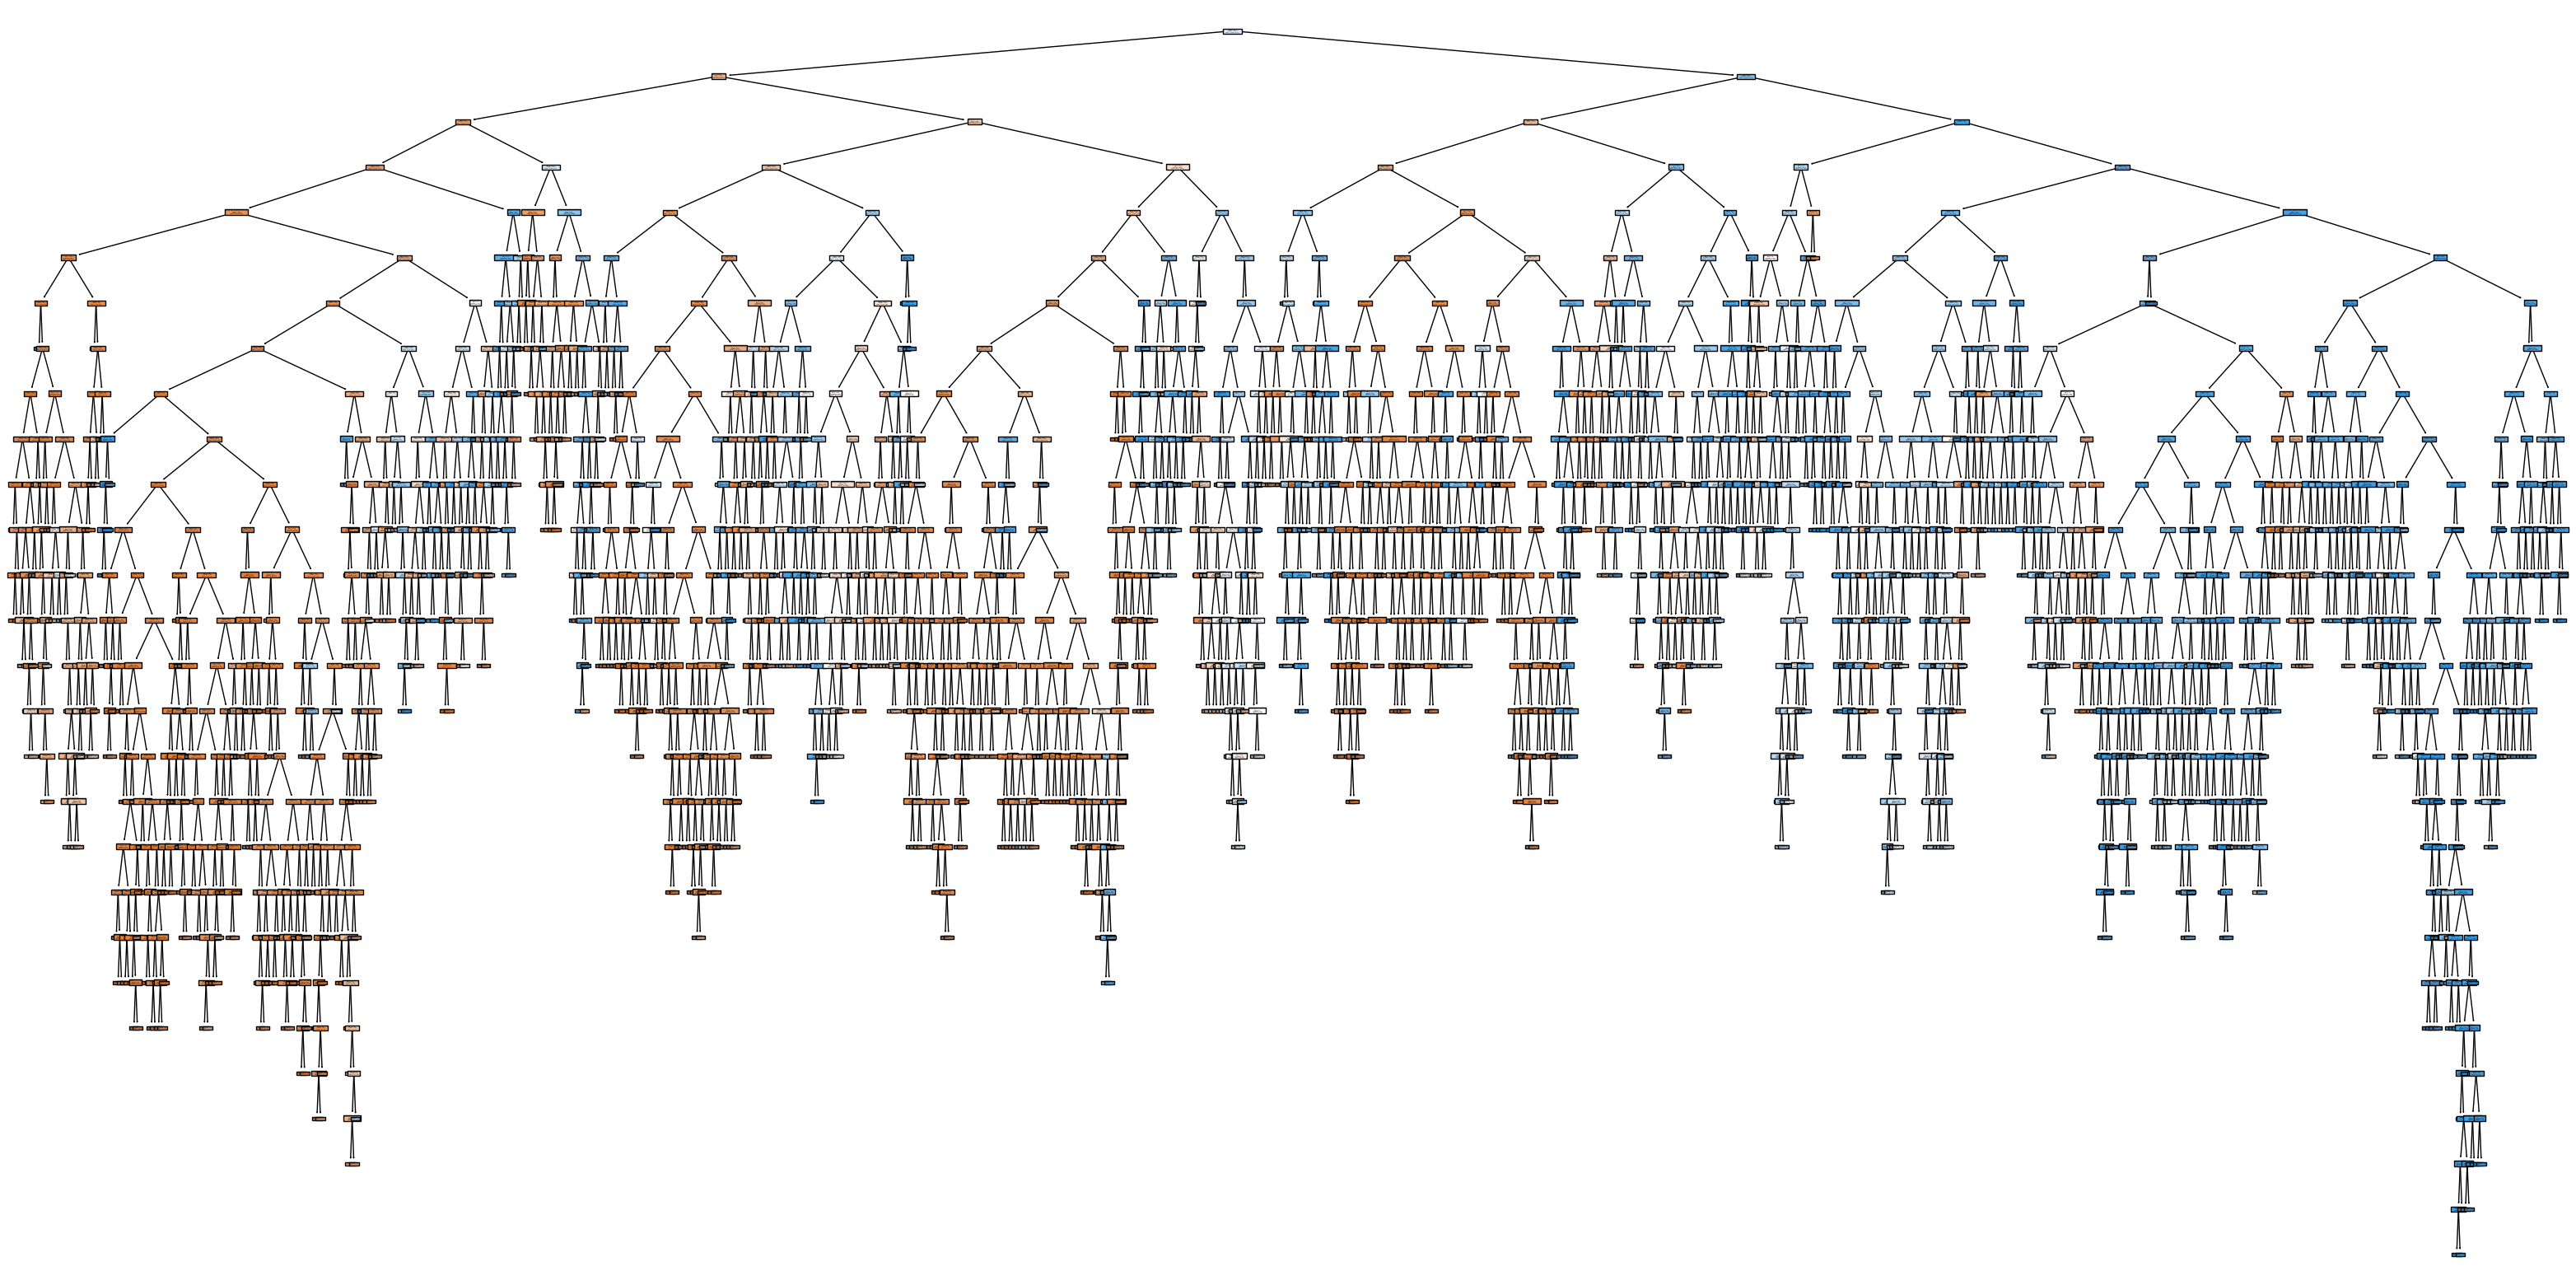

In [17]:
# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [18]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [19]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.918532,0.924427,0.925631,0.925029,0.835832,test,Decision tree Esta II
1,0.926730,0.933443,0.932183,0.932812,0.852250,train,Decision tree Esta II


In [20]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.920143,0.922581,0.931057,0.926799,0.838958,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.918532,0.924427,0.925631,0.925029,0.835832,test,Decision tree Esta II
1,0.926730,0.933443,0.932183,0.932812,0.852250,train,Decision tree Esta II


In [21]:
df_logistic_results = pd.read_csv("./datos/resultados_regresion.csv", index_col = 0)
df_logistic_results


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.826970,0.836453,0.846922,0.841655,0.650954,test,Regresión logistica
1,0.831502,0.843147,0.849157,0.846141,0.659930,train,Regresión logistica


In [22]:
# concatenamos todos los resultados

df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.826970,0.836453,0.846922,0.841655,0.650954,test,Regresión logistica
1,0.831502,0.843147,0.849157,0.846141,0.659930,train,Regresión logistica
2,0.920143,0.922581,0.931057,0.926799,0.838958,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.918532,0.924427,0.925631,0.925029,0.835832,test,Decision tree Esta II
5,0.926730,0.933443,0.932183,0.932812,0.852250,train,Decision tree Esta II


En conclusión y como podemos observar nuestros segundo modelo de Decision Tree II es el que obtiene mejores resultados. Con un max depth de 36 y un max features de 3 como la mejor combinación de parámetros.

In [23]:
# vamos a crearnos un dataframe 
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Inflight entertainment,0.272302
4,Ease of Online booking,0.256108
1,Seat comfort,0.146485
8,Online boarding,0.061905
2,Food and drink,0.043015
0,Customer Type,0.037055
12,Gender_Male,0.025907
6,Checkin service,0.023919
13,Type of Travel_Business travel,0.019773
14,Type of Travel_Personal Travel,0.019416


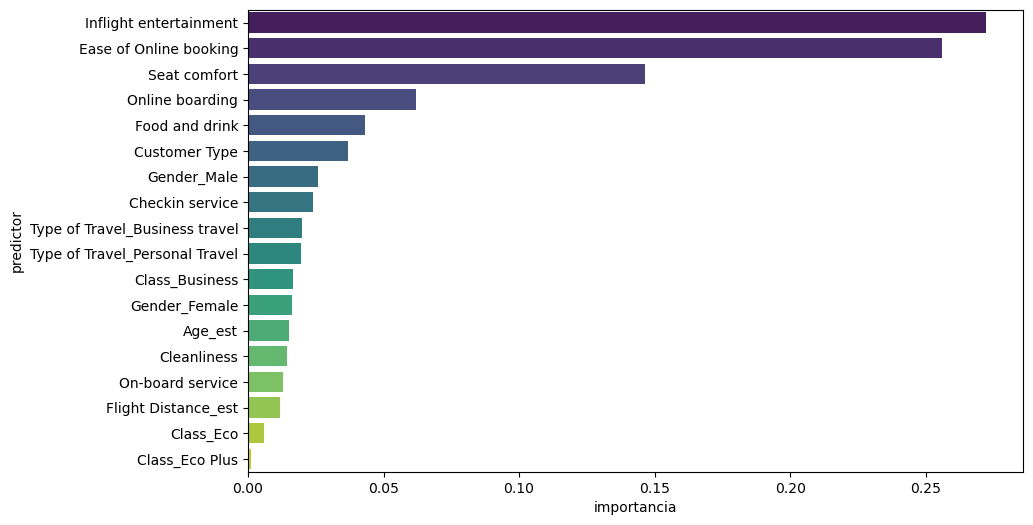

In [24]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()

Con respecto a laa hipotesis que nos planteabamos el Customer Type no afecta directamente a la satisfacción de los pasajeros, tanto como los servicios de entretenimiento a bordo y la facilidad de hacer la reserva online.

Guardamos los resultados.

In [26]:
df_DT_LR_results.to_csv("./datos/resultados_tree_log.csv")